In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size="5">Data Preprocessing</font>

In [301]:
#read the dataset
df = pd.read_csv('C:\\Users\\pdongre\\Downloads\\HBI_dataset\\raw\\LANGEVIN_DATA.txt', sep = " ")

In [302]:
#read the features and combine them with the dataset
columnsDf = pd.read_csv('C:\\Users\\pdongre\\Downloads\\HBI_dataset\\raw\\columns.csv')
columnsDfT = columnsDf.T.reset_index()
df = df.iloc[: , :-1]
df.columns = columnsDfT.iloc[0]

In [303]:
#simplified dataset
df_simple = df[['Occupant Number', 'Gender', 'INDOOR Ambient Temp.', 'INDOOR Mean Radiant Temp.', 'OUTDOOR Ambient Temp.', 
                'Min. Accept. Sensation (right now)', 'Med. Accept. Sensation (right now)', 'Max. Accept. Sensation (right now)', 
                'General Thermal Comfort (right now)', 'Thermal Sensation (right now)',
                'Wishes set point to stay at setting they choose', 'Chooses set point that is most agreeable to OTHERS',  
                'Action on THERMOSTAT (recently)']]

In [304]:
#dataset with survey values
df_survey = df_simple[df['General Thermal Comfort (right now)'] >= 0]
df_survey

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Action on THERMOSTAT (recently)
707,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,2.0,4.0,0.0
719,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,2.0,4.0,0.0
735,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,2.0,4.0,0.0
809,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,2.0,4.0,0.0
816,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806854,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,2.0,4.0,0.0
806870,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,2.0,4.0,0.0
806935,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,2.0,4.0,0.0
806950,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,2.0,4.0,0.0


In [305]:
#checking the number of NaN values 
df_survey.isna().sum()

0
Occupant Number                                         0
Gender                                                  0
INDOOR Ambient Temp.                                   17
INDOOR Mean Radiant Temp.                              17
OUTDOOR Ambient Temp.                                   0
Min. Accept. Sensation (right now)                      0
Med. Accept. Sensation (right now)                      0
Max. Accept. Sensation (right now)                      0
General Thermal Comfort (right now)                     0
Thermal Sensation (right now)                           0
Wishes set point to stay at setting they choose       125
Chooses set point that is most agreeable to OTHERS    125
Action on THERMOSTAT (recently)                         0
dtype: int64

In [306]:
#dividing the dataset into environment, personal characteristics, and personal values
df_env = df_survey[['INDOOR Ambient Temp.', 'INDOOR Mean Radiant Temp.', 'OUTDOOR Ambient Temp.']]
df_pc = df_survey[['Occupant Number', 'Gender', 'Min. Accept. Sensation (right now)', 'Med. Accept. Sensation (right now)', 
                   'Max. Accept. Sensation (right now)', 'Thermal Sensation (right now)', 
                   'General Thermal Comfort (right now)', 'Action on THERMOSTAT (recently)']]
df_pv = df_survey[['Wishes set point to stay at setting they choose', 'Chooses set point that is most agreeable to OTHERS']]

In [307]:
#filling missing values in df_env
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_env = pd.DataFrame(imputer.fit_transform(df_env),columns = df_env.columns)
df_env.isna().sum()

0
INDOOR Ambient Temp.         0
INDOOR Mean Radiant Temp.    0
OUTDOOR Ambient Temp.        0
dtype: int64

In [308]:
#casting decimal values in df_pc as integers
df_pc = df_pc.astype(int)
df_pc

,Occupant Number,Gender,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),Thermal Sensation (right now),General Thermal Comfort (right now),Action on THERMOSTAT (recently)
707,1,2,-2,-1,0,0,4,0
719,1,2,-2,-1,0,-2,3,0
735,1,2,-2,-1,0,0,5,0
809,1,2,-2,0,1,-1,4,0
816,1,2,-2,0,1,0,5,0
...,...,...,...,...,...,...,...,...
806854,24,2,-1,0,0,0,5,0
806870,24,2,0,0,0,-2,3,0
806935,24,2,-1,0,0,-2,4,0
806950,24,2,0,0,0,0,5,0


In [309]:
#filling missing values in df_pv
df_pv = pd.DataFrame(imputer.fit_transform(df_pv),columns = df_pv.columns)
df_pv.isna().sum()

0
Wishes set point to stay at setting they choose       0
Chooses set point that is most agreeable to OTHERS    0
dtype: int64

In [310]:
#casting decimal values in df_pv as integers
df_pv = df_pv.astype(int)
df_pv.index = df_pc.index
df_pv

,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS
707,2,4
719,2,4
735,2,4
809,2,4
816,2,4
...,...,...
806854,2,4
806870,2,4
806935,2,4
806950,2,4


In [312]:
#creating new features 'indoor operative temp' in df_env
df_env['Indoor Operative Temp.'] = (df_env['INDOOR Ambient Temp.'] + df_env['INDOOR Mean Radiant Temp.']) / 2
df_env

,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Indoor Operative Temp.
0,23.721585,23.721585,28.0,23.721585
1,23.980518,23.980518,30.0,23.980518
2,24.066829,24.066829,32.0,24.066829
3,23.290030,23.290030,27.0,23.290030
4,23.548963,23.548963,28.0,23.548963
...,...,...,...,...
2491,23.593889,23.593889,31.0,23.593889
2492,23.593889,23.593889,30.0,23.593889
2493,23.231392,23.231392,26.0,23.231392
2494,24.680556,24.680556,31.0,24.680556


In [313]:
#creating new feature 'acceptability group'; 0 = cooler, 1 = warmer in df_pc
group_mean = df_pc['Med. Accept. Sensation (right now)'].mean()
df_pc['Acceptability Group'] = np.where(df_pc['Med. Accept. Sensation (right now)'] < group_mean, 0, 1)
df_pc

,Occupant Number,Gender,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),Thermal Sensation (right now),General Thermal Comfort (right now),Action on THERMOSTAT (recently),Acceptability Group
707,1,2,-2,-1,0,0,4,0,0
719,1,2,-2,-1,0,-2,3,0,0
735,1,2,-2,-1,0,0,5,0,0
809,1,2,-2,0,1,-1,4,0,1
816,1,2,-2,0,1,0,5,0,1
...,...,...,...,...,...,...,...,...,...
806854,24,2,-1,0,0,0,5,0,1
806870,24,2,0,0,0,-2,3,0,1
806935,24,2,-1,0,0,-2,4,0,1
806950,24,2,0,0,0,0,5,0,1


In [314]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
df_pv_minmax = MinMaxScaler.fit_transform(df_pv)
df_pv_norm = pd.DataFrame(df_pv_minmax, columns=df_pv.columns)
df_pv_norm

,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS
0,0.333333,0.666667
1,0.333333,0.666667
2,0.333333,0.666667
3,0.333333,0.666667
4,0.333333,0.666667
...,...,...
2491,0.333333,0.666667
2492,0.333333,0.666667
2493,0.333333,0.666667
2494,0.333333,0.666667


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


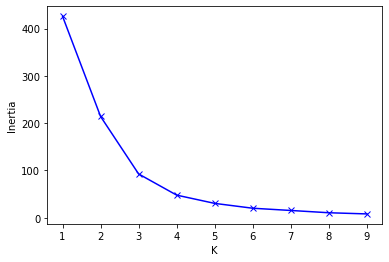

In [315]:
#applying elbow method
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)
  
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_pv_norm)
    inertia.append(km.inertia_)
    
plt.plot(K, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [318]:
#applying K-Means clustering on df_pv to categorize occupant values
import sklearn.cluster
km = sklearn.cluster.KMeans(n_clusters=4)
labels = km.fit_predict(df_pv_norm)
labelsDf = pd.DataFrame(labels, columns=['Values Cluster'])
labelsDf.index = df_pv_norm.index

In [319]:
#joining the dataframes
df_pv_cluster = df_pv_norm.join(labelsDf)
df_pv_cluster

,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Values Cluster
0,0.333333,0.666667,1
1,0.333333,0.666667,1
2,0.333333,0.666667,1
3,0.333333,0.666667,1
4,0.333333,0.666667,1
...,...,...,...
2491,0.333333,0.666667,1
2492,0.333333,0.666667,1
2493,0.333333,0.666667,1
2494,0.333333,0.666667,1


<AxesSubplot:xlabel='Wishes set point to stay at setting they choose', ylabel='Chooses set point that is most agreeable to OTHERS'>

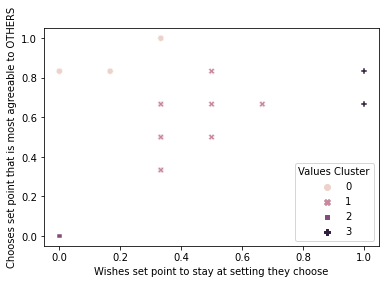

In [320]:
#plotting df_pv with clusters
sns.scatterplot(data=df_pv_cluster, x='Wishes set point to stay at setting they choose', y='Chooses set point that is most agreeable to OTHERS', hue='Values Cluster', style='Values Cluster')

In [321]:
#making occupant number as index for df_pv_cluster
df_pv_cluster.index = df_pc['Occupant Number']
df_pv_cluster

,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Values Cluster
Occupant Number,,,
1,0.333333,0.666667,1
1,0.333333,0.666667,1
1,0.333333,0.666667,1
1,0.333333,0.666667,1
1,0.333333,0.666667,1
...,...,...,...
24,0.333333,0.666667,1
24,0.333333,0.666667,1
24,0.333333,0.666667,1


In [322]:
#identifying unique values ib df_pv_index
df_pv_cluster['Occupant Number'] = df_pv_cluster.index
df_pv_cluster_unique = df_pv_cluster.drop_duplicates(subset=['Occupant Number'])
df_pv_cluster_unique[['Values Cluster']]

,Values Cluster
Occupant Number,
1,1
2,1
3,2
4,2
5,2
6,0
7,1
8,0
9,1


**Cluster 0 (agreeable to others) = 6, 8, 11, 12, 21**

**Cluster 1 (balanced) = 1, 2, 7, 9, 10, 13, 14, 16, 17, 19, 20, 23, 24**

**Cluster 2 (no response) = 3, 4, 5**

**Cluster 3 (own preference) = 15, 18, 22**

<font size="5">Logistic Regression for General Thermal Comfort predictions</font>

In [323]:
#count values for general thermal comfort
df_pc['General Thermal Comfort (right now)'].value_counts()

5    1265
4     755
3     278
6     158
2      33
1       7
Name: General Thermal Comfort (right now), dtype: int64

In [324]:
#changing general thermal comfort to binary; replacing labels; 0 = uncomfortable, 1 = comfortable
df_pc['General Thermal Comfort (right now)'] = df_pc['General Thermal Comfort (right now)'].replace([1, 2, 3, 4], 0)
df_pc['General Thermal Comfort (right now)'] = df_pc['General Thermal Comfort (right now)'].replace([5, 6], 1)
df_pc

,Occupant Number,Gender,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),Thermal Sensation (right now),General Thermal Comfort (right now),Action on THERMOSTAT (recently),Acceptability Group
707,1,2,-2,-1,0,0,0,0,0
719,1,2,-2,-1,0,-2,0,0,0
735,1,2,-2,-1,0,0,1,0,0
809,1,2,-2,0,1,-1,0,0,1
816,1,2,-2,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
806854,24,2,-1,0,0,0,1,0,1
806870,24,2,0,0,0,-2,0,0,1
806935,24,2,-1,0,0,-2,0,0,1
806950,24,2,0,0,0,0,1,0,1


In [325]:
#count values for general thermal comfort
df_pc['General Thermal Comfort (right now)'].value_counts()

1    1423
0    1073
Name: General Thermal Comfort (right now), dtype: int64

In [445]:
#Logistic regression to predicts probablilty of comfort
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#changing the index of df_env
df_env.index = df_pc.index

#features and targets for comfort prediction
X = pd.concat([df_env[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.']], df_pc['Acceptability Group']], axis=1)
y = df_pc[['General Thermal Comfort (right now)']]

In [446]:
#normalization
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X_minmax = MinMaxScaler.fit_transform(X)
X_norm = pd.DataFrame(X_minmax, columns=X.columns)

In [447]:
#model fit and accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.556


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [448]:
#model fit and accuracy on normalized dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2)

logreg_norm = LogisticRegression()
logreg_norm.fit(X_train, y_train)
y_pred = logreg_norm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.578


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [449]:
#printing coefficients
print(logreg.coef_, logreg.intercept_)
print(logreg_norm.coef_, logreg_norm.intercept_)

[[-0.12405516  0.01408349  0.76362895]] [2.3082353]
[[-0.74822676  0.50330657  0.6523502 ]] [-0.04492783]


<font size="5">Logistic Regression for Action on Thermostat based on Personal Characteristics</font>

In [331]:
#checking values for action on thermostat; 1, 2 = turned up; 3, 4 = turned down; 0 = no action
df_pc['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      16
3       6
2       1
Name: Action on THERMOSTAT (recently), dtype: int64

In [332]:
#creating new dataset for df_env and df_pc
df_action_list = [df_env, df_pc]
df_action = pd.concat(df_action_list, axis=1)
df_action

,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Indoor Operative Temp.,Occupant Number,Gender,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),Thermal Sensation (right now),General Thermal Comfort (right now),Action on THERMOSTAT (recently),Acceptability Group
707,23.721585,23.721585,28.0,23.721585,1,2,-2,-1,0,0,0,0,0
719,23.980518,23.980518,30.0,23.980518,1,2,-2,-1,0,-2,0,0,0
735,24.066829,24.066829,32.0,24.066829,1,2,-2,-1,0,0,1,0,0
809,23.290030,23.290030,27.0,23.290030,1,2,-2,0,1,-1,0,0,1
816,23.548963,23.548963,28.0,23.548963,1,2,-2,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806854,23.593889,23.593889,31.0,23.593889,24,2,-1,0,0,0,1,0,1
806870,23.593889,23.593889,30.0,23.593889,24,2,0,0,0,-2,0,0,1
806935,23.231392,23.231392,26.0,23.231392,24,2,-1,0,0,-2,0,0,1
806950,24.680556,24.680556,31.0,24.680556,24,2,0,0,0,0,1,0,1


In [333]:
#dividing the dataset into no action, thermostat up, thermostat down actions
df_idle = df_action[df_action['Action on THERMOSTAT (recently)'] == 0]
df_up1 = df_action[df_action['Action on THERMOSTAT (recently)'] == 1]
df_up2 = df_action[df_action['Action on THERMOSTAT (recently)'] == 2]
df_down3 = df_action[df_action['Action on THERMOSTAT (recently)'] == 3]
df_down4 = df_action[df_action['Action on THERMOSTAT (recently)'] == 4]

In [334]:
#concatinating dataframes to make df_up dataset
df_up_list = [df_idle, df_up1, df_up2]
df_up = pd.concat(df_up_list)
df_up['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      16
2       1
Name: Action on THERMOSTAT (recently), dtype: int64

In [335]:
#making df_up action on thermostat binary; 0 = no action, 1 = turned up
df_up['Action on THERMOSTAT (recently)'] = df_up['Action on THERMOSTAT (recently)'].replace(2, 1)
df_up['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      17
Name: Action on THERMOSTAT (recently), dtype: int64

In [336]:
#concatinating dataframes to make df_down dataset
df_down_list = [df_idle, df_down3, df_down4]
df_down = pd.concat(df_down_list)
df_down['Action on THERMOSTAT (recently)'].value_counts()

0    2473
3       6
Name: Action on THERMOSTAT (recently), dtype: int64

In [337]:
#making df_down action on thermostat binary; 0 = no action, 1 = turned down
df_down['Action on THERMOSTAT (recently)'] = df_down['Action on THERMOSTAT (recently)'].replace(3, 1)
df_down['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1       6
Name: Action on THERMOSTAT (recently), dtype: int64

In [339]:
#features and targets for thermostat up action
X_up = df_up[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Acceptability Group', 'Gender']]
y_up = df_up[['Action on THERMOSTAT (recently)']]

In [340]:
#normalization
X_up_minmax = MinMaxScaler.fit_transform(X_up)
X_up_norm = pd.DataFrame(X_up_minmax, columns=X_up.columns)

In [341]:
#oversampling thermostat up action dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_norm_up_over, y_up_over = oversample.fit_resample(X_up_norm, y_up)
y_up_over.value_counts()

Action on THERMOSTAT (recently)
0                                  2473
1                                  2473
dtype: int64

**Accuracy of thermostat up predictions based on personal characteristics**

In [342]:
#thermostat up predictions
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_norm_up_over, y_up_over, test_size = 0.2)

logreg_up = LogisticRegression()
logreg_up.fit(X_up_train, y_up_train)
y_up_pred = logreg_up.predict(X_up_test)
print(accuracy_score(y_up_test, y_up_pred))

0.7454545454545455


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [439]:
#printing coefficients
print(logreg_up.coef_, logreg_up.intercept_)

[[-6.57860367  2.0764526  -1.23016882  0.71164779]] [2.98861179]


In [343]:
#features and targets for thermostat down action
X_down = df_down[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Acceptability Group', 'Gender']]
y_down = df_down[['Action on THERMOSTAT (recently)']]

In [344]:
#normalization
X_down_minmax = MinMaxScaler.fit_transform(X_down)
X_down_norm = pd.DataFrame(X_down_minmax, columns=X_down.columns)

In [345]:
#oversampling thermostat up action dataset
X_norm_down_over, y_down_over = oversample.fit_resample(X_down_norm, y_down)
y_down_over.value_counts()

Action on THERMOSTAT (recently)
0                                  2473
1                                  2473
dtype: int64

**Accuracy of thermostat down predictions based on personal characteristics**

In [346]:
#thermostat down predictions
X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_norm_down_over, y_down_over, test_size = 0.2)

logreg_down = LogisticRegression()
logreg_down.fit(X_down_train, y_down_train)
y_down_pred = logreg_down.predict(X_down_test)
print(accuracy_score(y_down_test, y_down_pred))

0.7898989898989899


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [440]:
#printing coefficients
print(logreg_down.coef_, logreg_down.intercept_)

[[ 4.53380309 -1.96029324 -2.52840393 -1.73347406]] [0.3227753]


<font size="5">Logistic Regression for Action on Thermostat based on Personal Values</font>

In [363]:
#chaning index of df_pv_cluster to concat
df_pv_cluster.index = df_pv.index
df_pv_cluster

,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Values Cluster,Occupant Number
707,0.333333,0.666667,1,1
719,0.333333,0.666667,1,1
735,0.333333,0.666667,1,1
809,0.333333,0.666667,1,1
816,0.333333,0.666667,1,1
...,...,...,...,...
806854,0.333333,0.666667,1,24
806870,0.333333,0.666667,1,24
806935,0.333333,0.666667,1,24
806950,0.333333,0.666667,1,24


In [380]:
#creating new dataset for df_env, df_pv_cluster and df_pc
df_action_list_v = [df_env, df_pv, df_pv_cluster['Values Cluster'], df_pc[['Gender', 'Action on THERMOSTAT (recently)']]]
df_action_v = pd.concat(df_action_list_v, axis=1)
df_action_v

,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Indoor Operative Temp.,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Values Cluster,Gender,Action on THERMOSTAT (recently)
707,23.721585,23.721585,28.0,23.721585,2,4,1,2,0
719,23.980518,23.980518,30.0,23.980518,2,4,1,2,0
735,24.066829,24.066829,32.0,24.066829,2,4,1,2,0
809,23.290030,23.290030,27.0,23.290030,2,4,1,2,0
816,23.548963,23.548963,28.0,23.548963,2,4,1,2,0
...,...,...,...,...,...,...,...,...,...
806854,23.593889,23.593889,31.0,23.593889,2,4,1,2,0
806870,23.593889,23.593889,30.0,23.593889,2,4,1,2,0
806935,23.231392,23.231392,26.0,23.231392,2,4,1,2,0
806950,24.680556,24.680556,31.0,24.680556,2,4,1,2,0


In [401]:
#dividing the dataset into no action, thermostat up, thermostat down actions
df_idle_v = df_action_v[df_action_v['Action on THERMOSTAT (recently)'] == 0]
df_up1_v = df_action_v[df_action_v['Action on THERMOSTAT (recently)'] == 1]
df_up2_v = df_action_v[df_action_v['Action on THERMOSTAT (recently)'] == 2]
df_down3_v = df_action_v[df_action_v['Action on THERMOSTAT (recently)'] == 3]
df_down4_v = df_action_v[df_action_v['Action on THERMOSTAT (recently)'] == 4]

In [402]:
#concatinating dataframes to make df_up_v dataset
df_up_list_v = [df_idle_v, df_up1_v, df_up2_v]
df_up_v = pd.concat(df_up_list_v)
df_up_v['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      16
2       1
Name: Action on THERMOSTAT (recently), dtype: int64

In [403]:
#making df_up_v action on thermostat binary; 0 = no action, 1 = turned up
df_up_v['Action on THERMOSTAT (recently)'] = df_up_v['Action on THERMOSTAT (recently)'].replace(2, 1)
df_up_v['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      17
Name: Action on THERMOSTAT (recently), dtype: int64

In [404]:
#concatinating dataframes to make df_down_v dataset
df_down_list_v = [df_idle_v, df_down3_v, df_down4_v]
df_down_v = pd.concat(df_down_list_v)
df_down_v['Action on THERMOSTAT (recently)'].value_counts()

0    2473
3       6
Name: Action on THERMOSTAT (recently), dtype: int64

In [405]:
#making df_down_v action on thermostat binary; 0 = no action, 1 = turned down
df_down_v['Action on THERMOSTAT (recently)'] = df_down_v['Action on THERMOSTAT (recently)'].replace(3, 1)
df_down_v['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1       6
Name: Action on THERMOSTAT (recently), dtype: int64

In [419]:
#features and targets for thermostat up action based on personal values
X_up_v = df_up_v[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Values Cluster', 'Gender']]
y_up_v = df_up_v[['Action on THERMOSTAT (recently)']]

In [420]:
#normalization
X_up_v_minmax = MinMaxScaler.fit_transform(X_up_v)
X_up_v_norm = pd.DataFrame(X_up_v_minmax, columns=X_up_v.columns)

In [421]:
#oversampling thermostat up action dataset
X_norm_up_v_over, y_up_v_over = oversample.fit_resample(X_up_v_norm, y_up_v)
y_up_v_over.value_counts()

Action on THERMOSTAT (recently)
0                                  2473
1                                  2473
dtype: int64

**Accuracy of thermostat up predictions based on personal values**

In [422]:
#thermostat up predictions
X_up_v_train, X_up_v_test, y_up_v_train, y_up_v_test = train_test_split(X_norm_up_v_over, y_up_v_over, test_size = 0.2)

logreg_up_v = LogisticRegression()
logreg_up_v.fit(X_up_v_train, y_up_v_train)
y_up_v_pred = logreg_up_v.predict(X_up_v_test)
print(accuracy_score(y_up_v_test, y_up_v_pred))

0.8939393939393939


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [441]:
print(logreg_up_v.coef_, logreg_up_v.intercept_)

[[-8.13943982  1.3767503   7.47617522  1.01314896]] [-2.19615614]


In [423]:
#features and targets for thermostat down action
X_down_v = df_down_v[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Values Cluster', 'Gender']]
y_down_v = df_down_v[['Action on THERMOSTAT (recently)']]

In [424]:
#normalization
X_down_v_minmax = MinMaxScaler.fit_transform(X_down_v)
X_down_v_norm = pd.DataFrame(X_down_v_minmax, columns=X_down_v.columns)

In [425]:
#oversampling thermostat up action dataset
X_norm_down_v_over, y_down_v_over = oversample.fit_resample(X_down_v_norm, y_down_v)
y_down_v_over.value_counts()

Action on THERMOSTAT (recently)
0                                  2473
1                                  2473
dtype: int64

**Accuracy of thermostat down predictions based on personal values**

In [426]:
#thermostat down predictions
X_down_v_train, X_down_v_test, y_down_v_train, y_down_v_test = train_test_split(X_norm_down_v_over, y_down_v_over, test_size = 0.2)

logreg_down_v = LogisticRegression()
logreg_down_v.fit(X_down_v_train, y_down_v_train)
y_down_v_pred = logreg_down_v.predict(X_down_v_test)
print(accuracy_score(y_down_v_test, y_down_v_pred))

0.8232323232323232


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [442]:
print(logreg_down_v.coef_, logreg_down_v.intercept_)

[[ 8.37398114 -2.97889524  5.08036809 -2.99472078]] [-5.82107046]


<font size="5">Logistic Regression for Action on Thermostat based on Personal Characteristic and Personal Values</font>

In [400]:
#creating new dataset for df_env, df_pv_cluster and df_pc
df_action_list_c = [df_env, df_pv, df_pv_cluster['Values Cluster'], df_pc[['Gender', 'Acceptability Group', 'Action on THERMOSTAT (recently)']]]
df_action_c = pd.concat(df_action_list_c, axis=1)
df_action_c

,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Indoor Operative Temp.,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Values Cluster,Gender,Acceptability Group,Action on THERMOSTAT (recently)
707,23.721585,23.721585,28.0,23.721585,2,4,1,2,0,0
719,23.980518,23.980518,30.0,23.980518,2,4,1,2,0,0
735,24.066829,24.066829,32.0,24.066829,2,4,1,2,0,0
809,23.290030,23.290030,27.0,23.290030,2,4,1,2,1,0
816,23.548963,23.548963,28.0,23.548963,2,4,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
806854,23.593889,23.593889,31.0,23.593889,2,4,1,2,1,0
806870,23.593889,23.593889,30.0,23.593889,2,4,1,2,1,0
806935,23.231392,23.231392,26.0,23.231392,2,4,1,2,1,0
806950,24.680556,24.680556,31.0,24.680556,2,4,1,2,1,0


In [414]:
#dividing the dataset into no action, thermostat up, thermostat down actions
df_idle_c = df_action_c[df_action_c['Action on THERMOSTAT (recently)'] == 0]
df_up1_c = df_action_c[df_action_c['Action on THERMOSTAT (recently)'] == 1]
df_up2_c = df_action_c[df_action_c['Action on THERMOSTAT (recently)'] == 2]
df_down3_c = df_action_c[df_action_c['Action on THERMOSTAT (recently)'] == 3]
df_down4_c = df_action_c[df_action_c['Action on THERMOSTAT (recently)'] == 4]

In [415]:
#concatinating dataframes to make df_up_c dataset
df_up_list_c = [df_idle_c, df_up1_c, df_up2_c]
df_up_c = pd.concat(df_up_list_c)
df_up_c['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      16
2       1
Name: Action on THERMOSTAT (recently), dtype: int64

In [416]:
#making df_up_c action on thermostat binary; 0 = no action, 1 = turned up
df_up_c['Action on THERMOSTAT (recently)'] = df_up_c['Action on THERMOSTAT (recently)'].replace(2, 1)
df_up_c['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1      17
Name: Action on THERMOSTAT (recently), dtype: int64

In [417]:
#concatinating dataframes to make df_down_c dataset
df_down_list_c = [df_idle_c, df_down3_c, df_down4_c]
df_down_c = pd.concat(df_down_list_c)
df_down_c['Action on THERMOSTAT (recently)'].value_counts()

0    2473
3       6
Name: Action on THERMOSTAT (recently), dtype: int64

In [430]:
#making df_down_c action on thermostat binary; 0 = no action, 1 = turned down
df_down_c['Action on THERMOSTAT (recently)'] = df_down_c['Action on THERMOSTAT (recently)'].replace(3, 1)
df_down_c['Action on THERMOSTAT (recently)'].value_counts()

0    2473
1       6
Name: Action on THERMOSTAT (recently), dtype: int64

In [431]:
#features and targets for thermostat up action based on personal characteristics and personal values
X_up_c = df_up_c[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Acceptability Group', 'Values Cluster', 'Gender']]
y_up_c = df_up_c[['Action on THERMOSTAT (recently)']]

In [432]:
#normalization
X_up_c_minmax = MinMaxScaler.fit_transform(X_up_c)
X_up_c_norm = pd.DataFrame(X_up_c_minmax, columns=X_up_c.columns)

In [433]:
#oversampling thermostat up action dataset
X_norm_up_c_over, y_up_c_over = oversample.fit_resample(X_up_c_norm, y_up_c)
y_up_c_over.value_counts()

Action on THERMOSTAT (recently)
0                                  2473
1                                  2473
dtype: int64

**Accuracy of thermostat up predictions based on personal characteristics and personal values**

In [434]:
#thermostat up predictions
X_up_c_train, X_up_c_test, y_up_c_train, y_up_c_test = train_test_split(X_norm_up_c_over, y_up_c_over, test_size = 0.2)

logreg_up_c = LogisticRegression()
logreg_up_c.fit(X_up_c_train, y_up_c_train)
y_up_c_pred = logreg_up_c.predict(X_up_c_test)
print(accuracy_score(y_up_c_test, y_up_c_pred))

0.8727272727272727


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [443]:
print(logreg_up_c.coef_, logreg_up_c.intercept_)

[[-8.49678619  1.80162893  1.45720128  8.25410695  0.38246777]] [-3.37428577]


In [ ]:
p_up = 1 / (1 + (2.718281828459045 ** (-(-3.37428577 + (-8.49678619 * indoor_temp) + (1.80162893  * outdoor_temp) + (1.45720128 * acceptability_group) + (8.25410695 * values_cluster) + (0.38246777 * gender)))))

In [502]:
p_up = 1 / (1 + (2.718281828459045 ** (-(-3.37428577 + (-8.49678619 * 23) + (1.80162893  * 30) + (1.45720128 * 1) + (8.25410695 * 3) + (0.38246777 * 1)))))
print(p_up)

4.878874195907804e-52


In [435]:
#features and targets for thermostat down action
X_down_c = df_down_c[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Acceptability Group', 'Values Cluster', 'Gender']]
y_down_c = df_down_c[['Action on THERMOSTAT (recently)']]

In [436]:
#normalization
X_down_c_minmax = MinMaxScaler.fit_transform(X_down_c)
X_down_c_norm = pd.DataFrame(X_down_c_minmax, columns=X_down_c.columns)

In [437]:
#oversampling thermostat up action dataset
X_norm_down_c_over, y_down_c_over = oversample.fit_resample(X_down_c_norm, y_down_c)
y_down_c_over.value_counts()

Action on THERMOSTAT (recently)
0                                  2473
1                                  2473
dtype: int64

**Accuracy of thermostat down predictions based on personal characteristics and personal values**

In [438]:
#thermostat down predictions
X_down_c_train, X_down_c_test, y_down_c_train, y_down_c_test = train_test_split(X_norm_down_c_over, y_down_c_over, test_size = 0.2)

logreg_down_c = LogisticRegression()
logreg_down_c.fit(X_down_c_train, y_down_c_train)
y_down_c_pred = logreg_down_c.predict(X_down_c_test)
print(accuracy_score(y_down_c_test, y_down_c_pred))

0.8313131313131313


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [444]:
print(logreg_down_c.coef_, logreg_down_c.intercept_)

[[ 8.29234333 -2.56114989 -0.31719611  4.8951884  -3.02107435]] [-5.67524718]


In [498]:
p_down = 1 / (1 + (2.718281828459045 ** (-(-5.67524718 + (8.29234333 * indoor_temp) + (-2.56114989  * outdoor_temp) + (-0.31719611 * acceptability_group) + (4.8951884 * values_cluster) + (-3.02107435 * gender)))))

7.151930109704281e-52


<font size="5">Dataframe for each occupant in the survey dataframe</font>

In [459]:
#name of each occupant dataframe
import re
df_survey_occ = ['df_survey_occ' + occ for occ in df_pc['Occupant Number'].astype(str)]
df_survey_occ = list(set(df_survey_occ))

#method to sort name of occupants
def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

df_survey_occ = list(sorted_nicely(df_survey_occ))

#list of all occupant dataframe
df_list = []
for i in range(1, 25):
    df_list.append(df_pc[df_pc['Occupant Number'] == i])

In [460]:
df_survey_occ1 = pd.DataFrame(df_list[0])
df_survey_occ2 = pd.DataFrame(df_list[1])
df_survey_occ3 = pd.DataFrame(df_list[2])
df_survey_occ4 = pd.DataFrame(df_list[3])
df_survey_occ5 = pd.DataFrame(df_list[4])
df_survey_occ6 = pd.DataFrame(df_list[5])
df_survey_occ7 = pd.DataFrame(df_list[6])
df_survey_occ8 = pd.DataFrame(df_list[7])
df_survey_occ9 = pd.DataFrame(df_list[8])
df_survey_occ10 = pd.DataFrame(df_list[9])
df_survey_occ11 = pd.DataFrame(df_list[10])
df_survey_occ12 = pd.DataFrame(df_list[11])
df_survey_occ13 = pd.DataFrame(df_list[12])
df_survey_occ14 = pd.DataFrame(df_list[13])
df_survey_occ15 = pd.DataFrame(df_list[14])
df_survey_occ16 = pd.DataFrame(df_list[15])
df_survey_occ17 = pd.DataFrame(df_list[16])
df_survey_occ18 = pd.DataFrame(df_list[17])
df_survey_occ19 = pd.DataFrame(df_list[18])
df_survey_occ20 = pd.DataFrame(df_list[19])
df_survey_occ21 = pd.DataFrame(df_list[20])
df_survey_occ22 = pd.DataFrame(df_list[21])
df_survey_occ23 = pd.DataFrame(df_list[22])
df_survey_occ24 = pd.DataFrame(df_list[23])

In [464]:
print('yearly mean Acceptability Group occ1 = ', df_survey_occ1['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ2 = ', df_survey_occ2['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ3 = ', df_survey_occ3['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ4 = ', df_survey_occ4['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ5 = ', df_survey_occ5['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ6 = ', df_survey_occ6['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ7 = ', df_survey_occ7['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ8 = ', df_survey_occ8['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ9 = ', df_survey_occ9['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ10 = ', df_survey_occ10['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ11 = ', df_survey_occ11['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ12 = ', df_survey_occ12['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ13 = ', df_survey_occ13['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ14 = ', df_survey_occ14['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ15 = ', df_survey_occ15['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ16 = ', df_survey_occ16['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ17 = ', df_survey_occ17['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ18 = ', df_survey_occ18['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ19 = ', df_survey_occ19['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ20 = ', df_survey_occ20['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ21 = ', df_survey_occ21['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ22 = ', df_survey_occ22['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ23 = ', df_survey_occ23['Acceptability Group'].mean())
print('yearly mean Acceptability Group occ24 = ', df_survey_occ24['Acceptability Group'].mean())

yearly mean Acceptability Group occ1 =  0.8442622950819673
yearly mean Acceptability Group occ2 =  0.9024390243902439
yearly mean Acceptability Group occ3 =  0.7293233082706767
yearly mean Acceptability Group occ4 =  0.9920634920634921
yearly mean Acceptability Group occ5 =  0.9586776859504132
yearly mean Acceptability Group occ6 =  1.0
yearly mean Acceptability Group occ7 =  0.8
yearly mean Acceptability Group occ8 =  0.6964285714285714
yearly mean Acceptability Group occ9 =  0.975
yearly mean Acceptability Group occ10 =  1.0
yearly mean Acceptability Group occ11 =  0.9666666666666667
yearly mean Acceptability Group occ12 =  1.0
yearly mean Acceptability Group occ13 =  0.984
yearly mean Acceptability Group occ14 =  0.8106060606060606
yearly mean Acceptability Group occ15 =  0.9880952380952381
yearly mean Acceptability Group occ16 =  1.0
yearly mean Acceptability Group occ17 =  1.0
yearly mean Acceptability Group occ18 =  0.03508771929824561
yearly mean Acceptability Group occ19 =  0.9

In [479]:
#creating a list of yearly mean acceptability groups
accept_list = [df_survey_occ1['Acceptability Group'].mean(), df_survey_occ2['Acceptability Group'].mean(), 
              df_survey_occ3['Acceptability Group'].mean(), df_survey_occ4['Acceptability Group'].mean(), 
              df_survey_occ5['Acceptability Group'].mean(), df_survey_occ6['Acceptability Group'].mean(), 
              df_survey_occ7['Acceptability Group'].mean(), df_survey_occ8['Acceptability Group'].mean(),
              df_survey_occ9['Acceptability Group'].mean(), df_survey_occ10['Acceptability Group'].mean(),
              df_survey_occ11['Acceptability Group'].mean(), df_survey_occ12['Acceptability Group'].mean(),
              df_survey_occ13['Acceptability Group'].mean(), df_survey_occ14['Acceptability Group'].mean(),
              df_survey_occ15['Acceptability Group'].mean(), df_survey_occ16['Acceptability Group'].mean(),
              df_survey_occ17['Acceptability Group'].mean(), df_survey_occ18['Acceptability Group'].mean(),
              df_survey_occ19['Acceptability Group'].mean(), df_survey_occ20['Acceptability Group'].mean(),
              df_survey_occ21['Acceptability Group'].mean(), df_survey_occ22['Acceptability Group'].mean(),
              df_survey_occ23['Acceptability Group'].mean(), df_survey_occ24['Acceptability Group'].mean()]
accept_list

[0.8442622950819673,
 0.9024390243902439,
 0.7293233082706767,
 0.9920634920634921,
 0.9586776859504132,
 1.0,
 0.8,
 0.6964285714285714,
 0.975,
 1.0,
 0.9666666666666667,
 1.0,
 0.984,
 0.8106060606060606,
 0.9880952380952381,
 1.0,
 1.0,
 0.03508771929824561,
 0.9736842105263158,
 1.0,
 0.9325842696629213,
 0.0,
 0.7209302325581395,
 0.9230769230769231]

<BarContainer object of 24 artists>

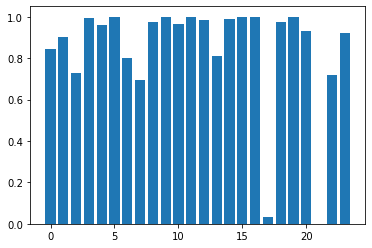

In [485]:
plt.bar(range(24), accept_list)

In [473]:
#printing genders; 1 = male, 2 = female
print('Gender occ1 = ', df_survey_occ1['Gender'].mean())
print('Gender occ2 = ', df_survey_occ2['Gender'].mean())
print('Gender occ3 = ', df_survey_occ3['Gender'].mean())
print('Gender occ4 = ', df_survey_occ4['Gender'].mean())
print('Gender occ5 = ', df_survey_occ5['Gender'].mean())
print('Gender occ6 = ', df_survey_occ6['Gender'].mean())
print('Gender occ7 = ', df_survey_occ7['Gender'].mean())
print('Gender occ8 = ', df_survey_occ8['Gender'].mean())
print('Gender occ9 = ', df_survey_occ9['Gender'].mean())
print('Gender occ10 = ', df_survey_occ10['Gender'].mean())
print('Gender occ11 = ', df_survey_occ11['Gender'].mean())
print('Gender occ12 = ', df_survey_occ12['Gender'].mean())
print('Gender occ13 = ', df_survey_occ13['Gender'].mean())
print('Gender occ14 = ', df_survey_occ14['Gender'].mean())
print('Gender occ15 = ', df_survey_occ15['Gender'].mean())
print('Gender occ16 = ', df_survey_occ16['Gender'].mean())
print('Gender occ17 = ', df_survey_occ17['Gender'].mean())
print('Gender occ18 = ', df_survey_occ18['Gender'].mean())
print('Gender occ19 = ', df_survey_occ19['Gender'].mean())
print('Gender occ20 = ', df_survey_occ20['Gender'].mean())
print('Gender occ21 = ', df_survey_occ21['Gender'].mean())
print('Gender occ22 = ', df_survey_occ22['Gender'].mean())
print('Gender occ23 = ', df_survey_occ23['Gender'].mean())
print('Gender occ24 = ', df_survey_occ24['Gender'].mean())

Gender occ1 =  2.0
Gender occ2 =  2.0
Gender occ3 =  2.0
Gender occ4 =  2.0
Gender occ5 =  1.0
Gender occ6 =  1.0
Gender occ7 =  2.0
Gender occ8 =  2.0
Gender occ9 =  2.0
Gender occ10 =  1.0
Gender occ11 =  2.0
Gender occ12 =  2.0
Gender occ13 =  2.0
Gender occ14 =  2.0
Gender occ15 =  2.0
Gender occ16 =  2.0
Gender occ17 =  1.0
Gender occ18 =  2.0
Gender occ19 =  1.0
Gender occ20 =  2.0
Gender occ21 =  1.0
Gender occ22 =  1.0
Gender occ23 =  1.0
Gender occ24 =  2.0


In [490]:
#creating a list of Genders
gender_list = [df_survey_occ1['Gender'].mean(), df_survey_occ2['Gender'].mean(), 
              df_survey_occ3['Gender'].mean(), df_survey_occ4['Gender'].mean(), 
              df_survey_occ5['Gender'].mean(), df_survey_occ6['Gender'].mean(), 
              df_survey_occ7['Gender'].mean(), df_survey_occ8['Gender'].mean(),
              df_survey_occ9['Gender'].mean(), df_survey_occ10['Gender'].mean(),
              df_survey_occ11['Gender'].mean(), df_survey_occ12['Gender'].mean(),
              df_survey_occ13['Gender'].mean(), df_survey_occ14['Gender'].mean(),
              df_survey_occ15['Gender'].mean(), df_survey_occ16['Gender'].mean(),
              df_survey_occ17['Gender'].mean(), df_survey_occ18['Gender'].mean(),
              df_survey_occ19['Gender'].mean(), df_survey_occ20['Gender'].mean(),
              df_survey_occ21['Gender'].mean(), df_survey_occ22['Gender'].mean(),
              df_survey_occ23['Gender'].mean(), df_survey_occ24['Gender'].mean()]
gender_list

[2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0]

In [491]:
df_pc_pv = df_pv_cluster_unique.drop(['Wishes set point to stay at setting they choose', 'Chooses set point that is most agreeable to OTHERS', 'Occupant Number'], axis=1)
df_pc_pv['Mean Acceptability Group'] = accept_list
df_pc_pv['Gender'] = gender_list
df_pc_pv

,Values Cluster,Mean Acceptability Group,Gender
Occupant Number,,,
1,1,0.844262,2.0
2,1,0.902439,2.0
3,2,0.729323,2.0
4,2,0.992063,2.0
5,2,0.958678,1.0
6,0,1.000000,1.0
7,1,0.800000,2.0
8,0,0.696429,2.0
9,1,0.975000,2.0


In [492]:
df_pc_pv['Mean Acceptability Group'] = np.where(df_pc_pv['Mean Acceptability Group'] < 0.75, 0, 1)
df_pc_pv

,Values Cluster,Mean Acceptability Group,Gender
Occupant Number,,,
1,1,1,2.0
2,1,1,2.0
3,2,0,2.0
4,2,1,2.0
5,2,1,1.0
6,0,1,1.0
7,1,1,2.0
8,0,0,2.0
9,1,1,2.0


**Cluster 0 (agreeable to others) = 6, 8, 11, 12, 21**

**Cluster 1 (balanced) = 1, 2, 7, 9, 10, 13, 14, 16, 17, 19, 20, 23, 24**

**Cluster 2 (no response) = 3, 4, 5**

**Cluster 3 (own preference) = 15, 18, 22**

altruist-cold-male (0-0-1) = 0
neutrals-cold-male (1-0-1) = 1
nopreferences-cold-male (2-0-1) = 0
egocentrics-cold-male (3-0-1) = 1

altruist-cold-female (0-0-2) = 1
neutrals-cold-female (1-0-2) = 0
nopreferences-cold-female (2-0-2) = 1
egocentrics-cold-female (3-0-2) = 1

altruist-warm-male (0-1-1) = 2
neutrals-warm-male (1-1-1) = 3
nopreferences-warm-male (2-1-1) = 1
egocentrics-warm-male (3-1-1) = 0

altruist-warm-female (0-1-2) = 2
neutrals-warm-female (1-1-2) = 9
nopreferences-warm-female (2-1-2) = 1
egocentrics-warm-female (3-1-2) = 1